In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [29]:
import warnings
warnings.filterwarnings("ignore")

Data downloaded from kaggle (https://www.kaggle.com/jealousleopard/goodreadsbooks)
on the 16/09/19 at 13:23 gmt.

Very quickly into just importing the data (books.csv) into my "master" jupyter notebook, I noticed there were a few errors.

Here is a link to another repository where I went through cleaning up the data before using it here. (It goes through the errors 

In [30]:
df = pd.read_csv("./data/books.csv", error_bad_lines=False)

In [31]:
df.index = df['bookID']

In [32]:
df.tail(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,,
47708,47708,The Faeries' Oracle,Brian Froud-Jessica Macbeth,4.43,743201116,9780743201117,eng,224,1550,38
47709,47709,The World of The Dark Crystal,Brian Froud,4.29,1862056242,9781862056244,eng,132,3572,33


In [33]:
df.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13719.000000,13719.000000,1.371900e+04,13719.000000,1.371900e+04,13719.000000
mean,22160.579270,3.930354,9.764024e+12,342.380713,1.775909e+04,533.439901
std,13699.603351,0.359400,3.986954e+11,252.618887,1.129371e+05,2528.565801
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10621.000000,3.770000,9.780345e+12,196.000000,8.250000e+01,7.000000
50%,21322.000000,3.960000,9.780613e+12,301.000000,6.300000e+02,40.000000
75%,33322.000000,4.130000,9.780940e+12,421.000000,4.737000e+03,222.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


In [34]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
# num_pages             int64
ratings_count           int64
text_reviews_count      int64
dtype: object

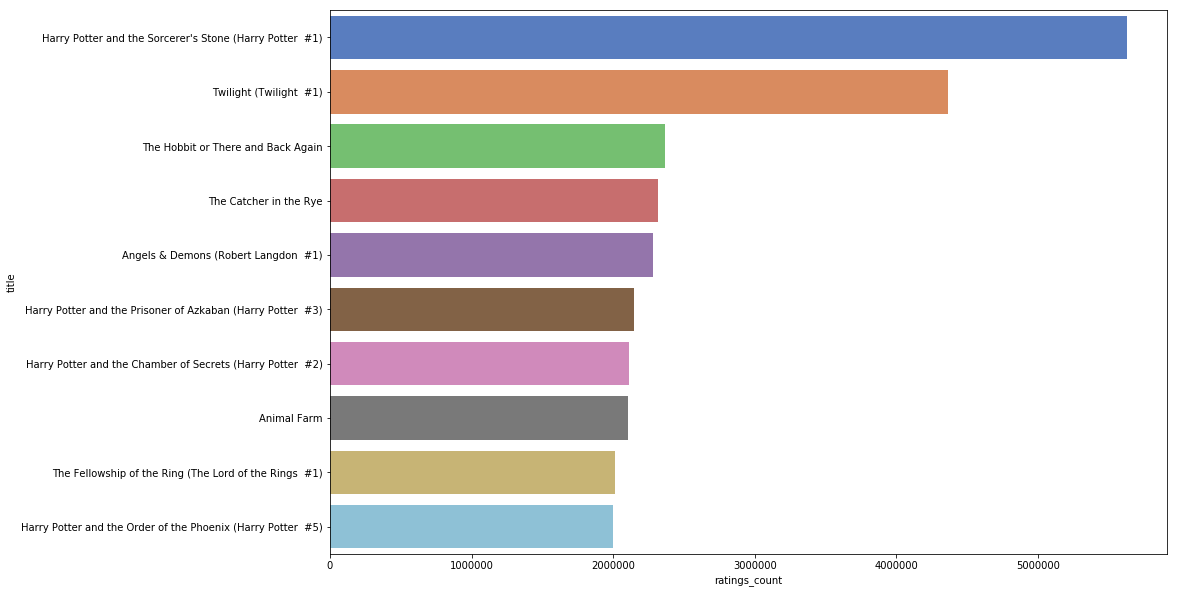

In [35]:
most_rated = df.sort_values('ratings_count', ascending=False).head(10).set_index('title')
plt.figure(figsize=(15, 10))
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='muted')

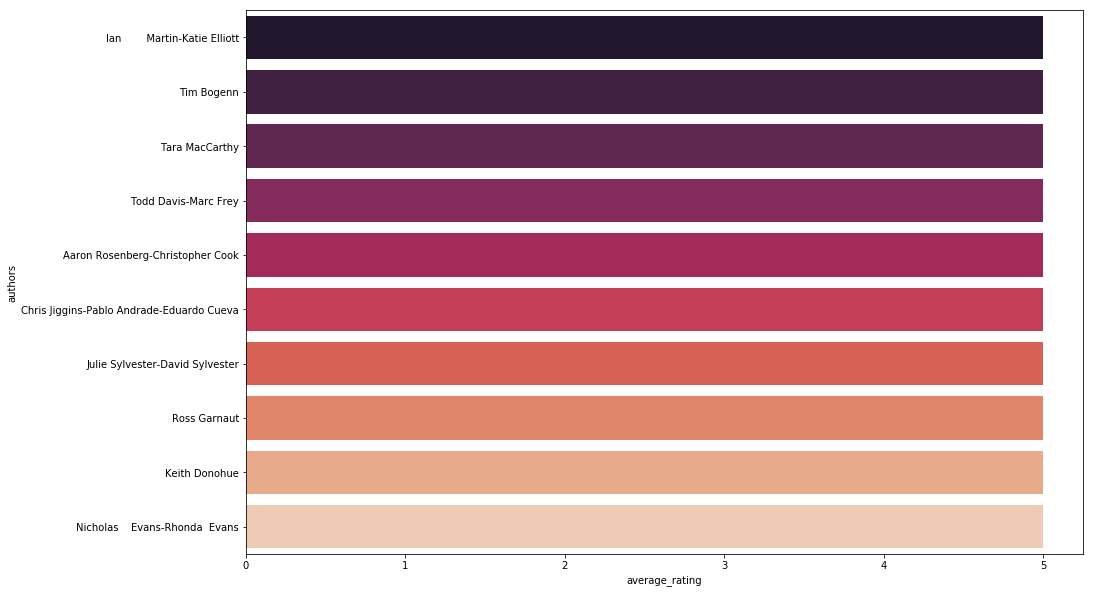

In [36]:
highest_avg_rating_author = df.sort_values('average_rating', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15, 10))
sns.barplot(highest_avg_rating_author['average_rating'], highest_avg_rating_author.index, palette='rocket')

In [37]:
rating_author = df.groupby('authors').mean()
rating_author = rating_author.loc[rating_author['ratings_count'] > 100]
rating_author.head(15)

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
authors,,,,,,
A.B. Yehoshua-Hillel Halkin,29179.0,3.585,9.780154e+12,416.0,634.5,85.5
A.J. Jacobs,28116.0,3.770,9.780743e+12,389.0,23343.0,2312.0
A.M. Homes,29413.0,3.455,9.781266e+12,238.5,2135.0,300.5
A.N. Roquelaure-Anne Rice,20157.4,3.644,9.780452e+12,336.2,11428.8,319.6
A.S. Byatt,26471.0,3.770,9.780678e+12,423.5,30618.5,1680.0
A.S. Byatt-Jean-Louis Chevalier,11718.0,3.890,9.782081e+12,507.0,369.0,34.0
Aaron Allston,20427.0,3.935,9.780450e+12,352.0,6636.5,78.5
Abdul Rahman Munif-Peter Theroux-Abdelrahman Munif,2722.0,4.100,9.780395e+12,627.0,813.0,100.0
Abigail Adams-Frank Shuffelton,2205.0,4.170,9.780142e+12,512.0,267.0,26.0


In [38]:
highest_avg_rating_author = rating_author.sort_values('average_rating', ascending=False).head(10)
highest_avg_rating_author.head(10)

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
authors,,,,,,
Saul Leiter-Martin Harrison,6550.000,4.7300,9.783865e+12,156.000,114.0000,7.00
David Allen Sibley,26805.000,4.7000,9.780679e+12,473.000,709.0000,35.00
Anonymous-Joyce Meyer,13358.000,4.7000,9.780447e+12,2208.000,1715.0000,56.00
Anonymous,20749.000,4.7000,9.780311e+12,2198.000,4092.0000,192.00
Bill Watterson,26371.375,4.6975,9.781733e+12,244.875,17550.1875,206.75
Anonymous-Thomas Cahill,27204.000,4.6600,9.780802e+12,81.000,133.0000,13.00
Neil Gaiman-Mike Dringenberg-Chris Bachalo-Michael Zulli-Kelly Jones-Charles Vess-Colleen Doran-Malcolm Jones III-Steve Parkhouse-Daniel Vozzo-Lee Loughridge-Steve Oliff-Todd Klein-Dave McKean-Sam Kieth,23753.000,4.6500,9.781401e+12,612.000,14849.0000,493.00
Hafez,46292.000,4.6300,9.789647e+12,566.000,3035.0000,89.00
Frank Darabont-Stephen King,39661.000,4.6300,9.781557e+12,184.000,2289.0000,24.00


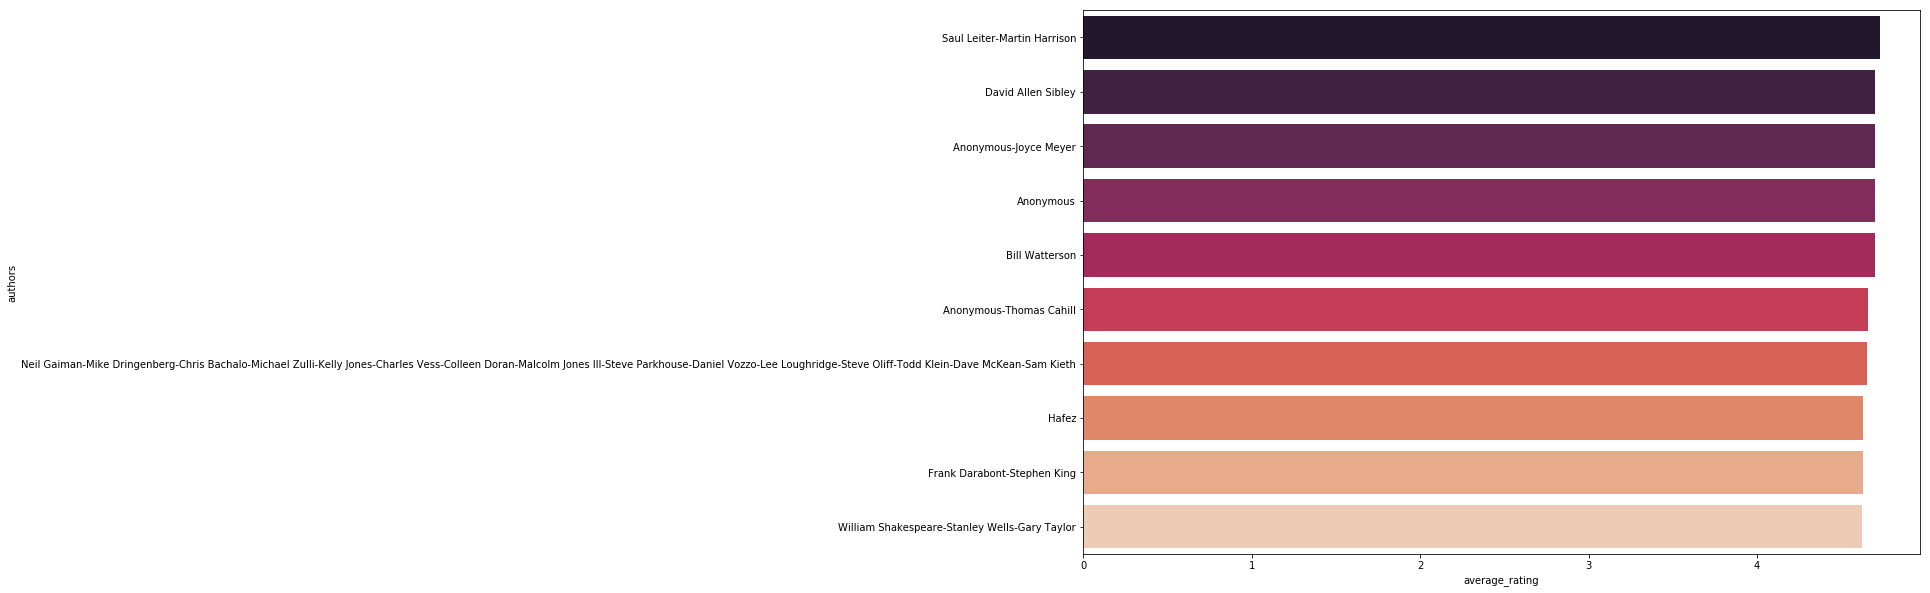

In [39]:
plt.figure(figsize=(15, 10))
sns.barplot(highest_avg_rating_author['average_rating'], highest_avg_rating_author.index, palette='rocket')

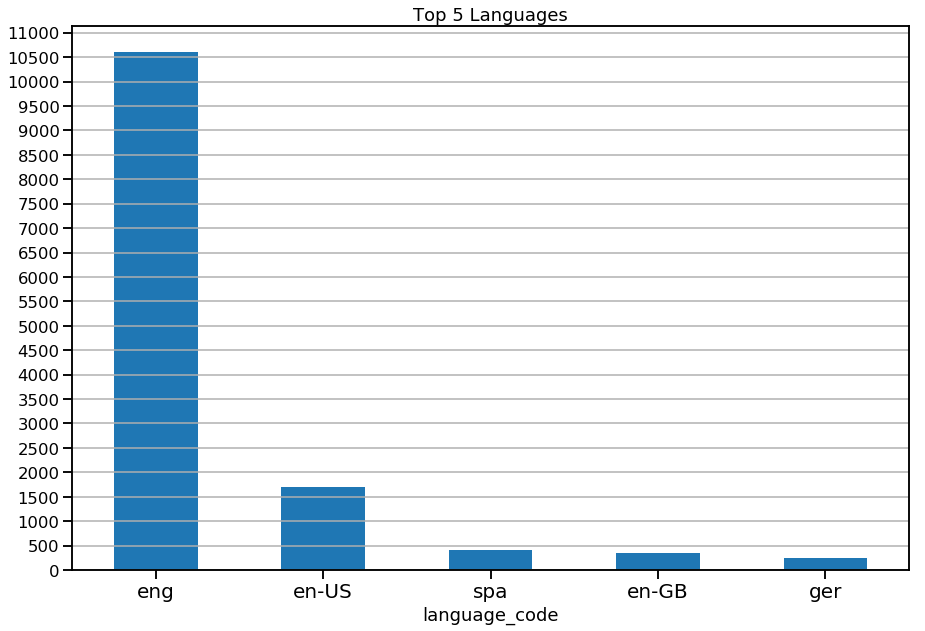

In [68]:
sns.set_context('talk')
plt.figure(figsize=(15,10))
ax =  df.groupby('language_code')['title'].count().sort_values(ascending=False).head(5).plot.bar()
plt.title('Top 5 Languages')
plt.xticks(fontsize = 20, rotation='horizontal')
plt.yticks([i*500 for i in range(0, 23)])
plt.grid(axis='y')

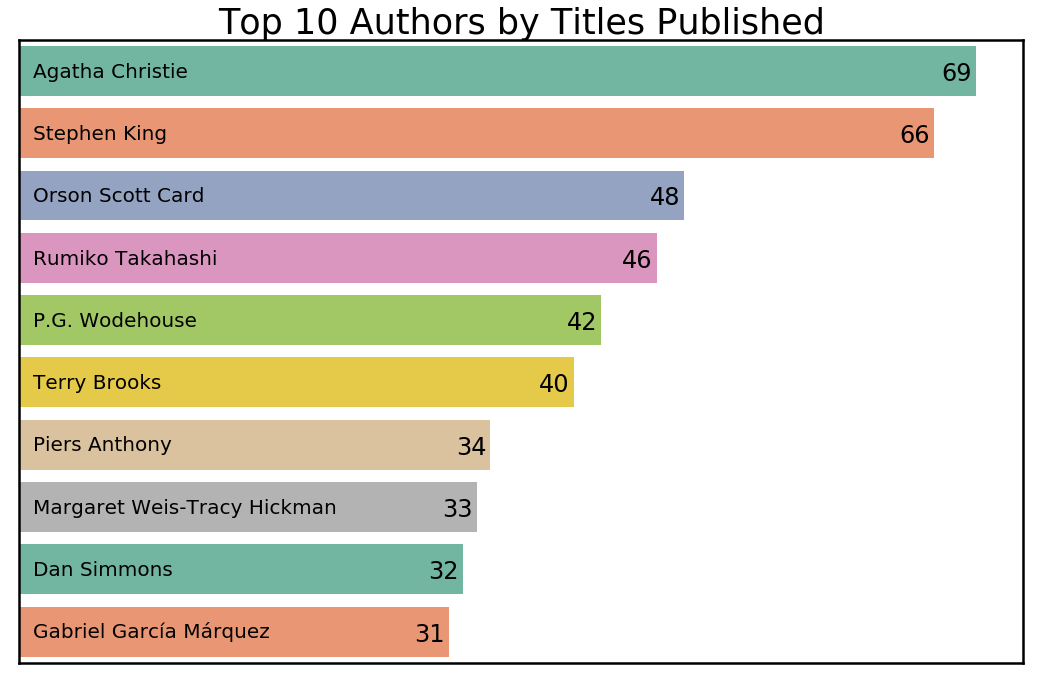

In [175]:
sns.set_context('poster')
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='Set2')
ax.set_title("Top 10 Authors by Titles Published", fontsize=35)
ax.set_ylabel('')
ax.set_xlabel("")
ax.set_yticks([])
ax.set_xticks([])
plt.tight_layout()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-2.5, i.get_y()+0.55, str(round(i.get_width()))[:-2], fontsize = 24, color = 'k')
    ax.text(i.get_width()-i.get_width()+1 , i.get_y()+0.5, str(most_books.index[num]), fontsize = 20, color = 'k')
    num = num + 1


In [120]:
most_books.head()

,title
authors,
Agatha Christie,69
Stephen King,66
Orson Scott Card,48
Rumiko Takahashi,46
P.G. Wodehouse,42


In [84]:
print(ax.patches)

[<matplotlib.patches.Rectangle object at 0x000002CE97483B70>, <matplotlib.patches.Rectangle object at 0x000002CE97267208>, <matplotlib.patches.Rectangle object at 0x000002CE97483F60>, <matplotlib.patches.Rectangle object at 0x000002CE9748E518>, <matplotlib.patches.Rectangle object at 0x000002CE9748E860>, <matplotlib.patches.Rectangle object at 0x000002CE9748EBA8>, <matplotlib.patches.Rectangle object at 0x000002CE9748EEF0>, <matplotlib.patches.Rectangle object at 0x000002CE9748EF28>, <matplotlib.patches.Rectangle object at 0x000002CE974975C0>, <matplotlib.patches.Rectangle object at 0x000002CE97497908>]
